In [152]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

# Linear Regression Using Least Square.
class LinearRegressionUsingLS:
    """
    Formula used: weight = inv(X.T * X) * X.T * Y
    weight_: the weight of feature space
    """

    def __init__(self):
        self = self
        
    def fit(self, x, y):
        """
        x : intput array, shape: (instance number, feature number)
        y : label array, shape: (instance number, label)
        """
        
        x = np.concatenate((x,np.ones((x.shape[0],1))),axis=1)
        
        self.weight_ = np.linalg.inv(x.T @ x) @ x.T @ y
        # the dimention of weight_ would be (feature number + 1, 1)
        
        return self

    def predict(self, x):
        """
        x : intput array, shape: (1, feature number)
        """
        x = np.concatenate((x,np.ones((x.shape[0],1))),axis=1)
        return x @ self.weight_ # a scalor

random.seed(0)
np.random.seed(0)

#assume y = ax + b
a = 2
b = -3

# generate the data with noise in normal distribution
def synthetic_dataset(n, mean, var):
    # Create x and y data
    x = np.random.uniform(-1,1,(n, 1))
    error = np.random.normal(loc=mean, scale=math.sqrt(var), size=(n,1))
    y = a * x + b + error
    return x, y

# plot all the lines predicted with respects to generated datasets and the ground truth
def plot_line(mean, var, m, n, tilte):
    lr = LinearRegressionUsingLS()
    x_hat = np.linspace(-10,10,20)
    x_hat.reshape(len(x_hat),1)
    all_weight = []
    lines = []
    fig, ax = plt.subplots(figsize = (8,8))
    for i in range(m):
        x,y = synthetic_dataset(n, mean, var)
        lr.fit(x,y)
        all_weight.append(lr.weight_)
        lines += ax.plot(x_hat, np.array(list(map(lambda x_hat: lr.weight_[0] * x_hat + lr.weight_[1], x_hat))), c='blue') 

    lines += ax.plot(x_hat, np.array(list(map(lambda x_hat: a * x_hat + b, x_hat))), c='red', label= "ground truth")

    ax.legend(lines[-2:], ['prediction','ground truth'])
    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim((-10, 10))
    ax.set_ylim((-10, 10))
    plt.tight_layout()
    plt.draw()

# plot all the parameters predicted with respects to generated datasets and the ground truth
def plot_parameter(mean, var, m, n, title):
    lr = LinearRegressionUsingLS()
    all_weight = []
    fig, ax = plt.subplots(figsize = (8,8))
    for i in range(m):
        x,y = synthetic_dataset(n, mean, var)
        lr.fit(x,y)
        all_weight.append(lr.weight_)
    
    weight = np.array(all_weight).T
    
    ax.scatter(weight[0][0], weight[0][1], c='blue', label='random datasets')
    ax.scatter([a], [b], c='red', label='ground truth')
    ax.set_title(title)
    ax.set_xlabel('$\hat{b}$')
    ax.set_ylabel('$\hat{a}$')
    ax.set_xlim((a-2, a+2))
    ax.set_ylim((b-2, b+2))
    ax.legend()
    plt.tight_layout()
    plt.draw()
    


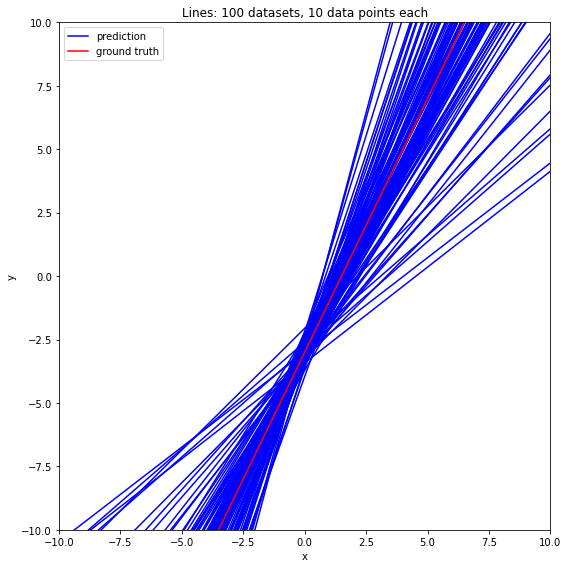

In [153]:
mean = 0
var = 1
m = 100 # Number of datasets
n = 10 # training examples in each dataset
title = "Lines: 100 datasets, 10 data points each"
plot_line(mean, var, m, n, title)

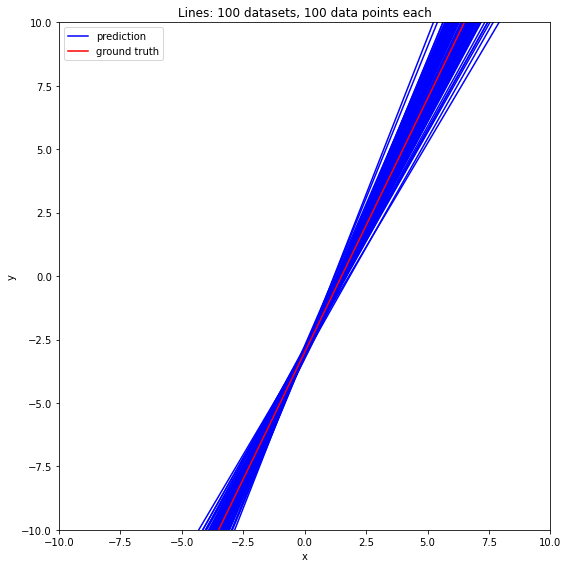

In [154]:
mean = 0
var = 1
m = 100 # Number of datasets
n = 100 # training examples in each dataset
title = "Lines: 100 datasets, 100 data points each"
plot_line(mean, var, m, n, title)


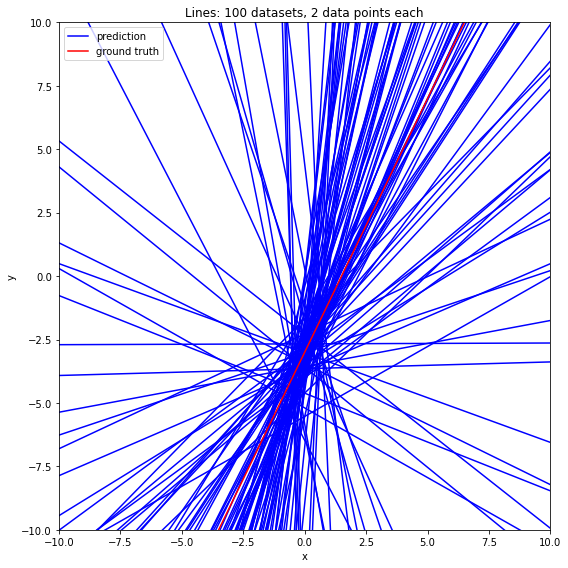

In [155]:
mean = 0
var = 1
m = 100 # Number of datasets
n = 2 # training examples in each dataset
title = "Lines: 100 datasets, 2 data points each"
plot_line(mean, var, m, n, title)


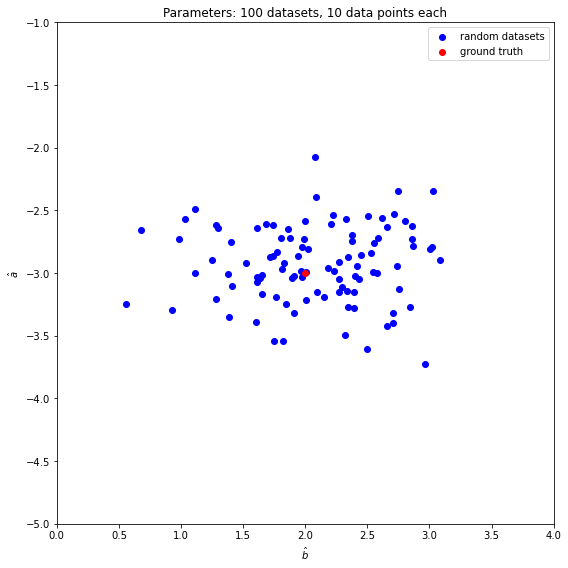

In [156]:
mean = 0
var = 1
m = 100 # Number of datasets
n = 10 # training examples in each dataset
title = "Parameters: 100 datasets, 10 data points each"

plot_parameter(mean, var, m, n, title)

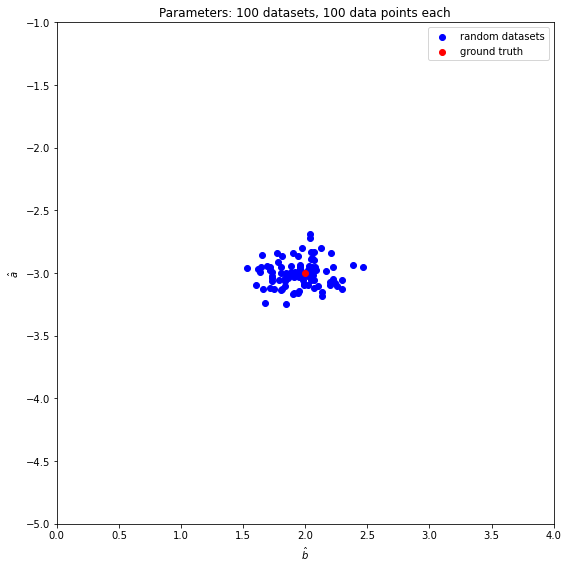

In [157]:
mean = 0
var = 1
m = 100 # Number of datasets
n = 100 # training examples in each dataset
title = "Parameters: 100 datasets, 100 data points each"

plot_parameter(mean, var, m, n, title)


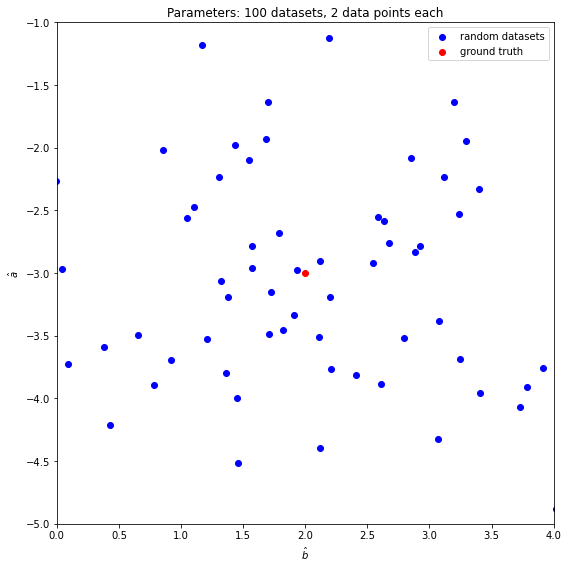

In [158]:
mean = 0
var = 1
m = 100 # Number of datasets
n = 2 # training examples in each dataset
title = "Parameters: 100 datasets, 2 data points each"

plot_parameter(mean, var, m, n, title)

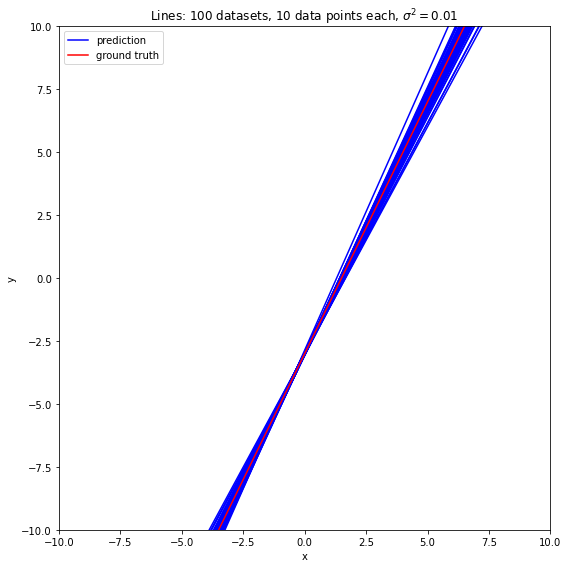

In [159]:
mean = 0
var = 0.01
m = 100 # Number of datasets
n = 10 # training examples in each dataset

title = "Lines: 100 datasets, 10 data points each, $\sigma^{2} = 0.01$"

plot_line(mean, var, m, n, title)

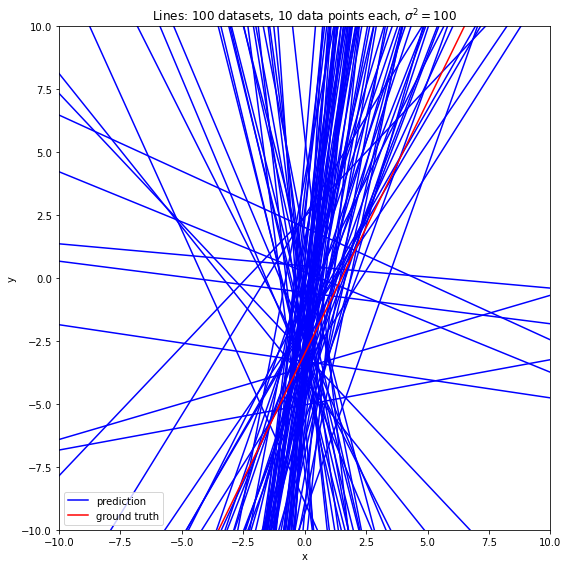

In [160]:
mean = 0
var = 100
m = 100 # Number of datasets
n = 10 # training examples in each dataset

title = "Lines: 100 datasets, 10 data points each, $\sigma^{2} = 100$"

plot_line(mean, var, m, n, title)

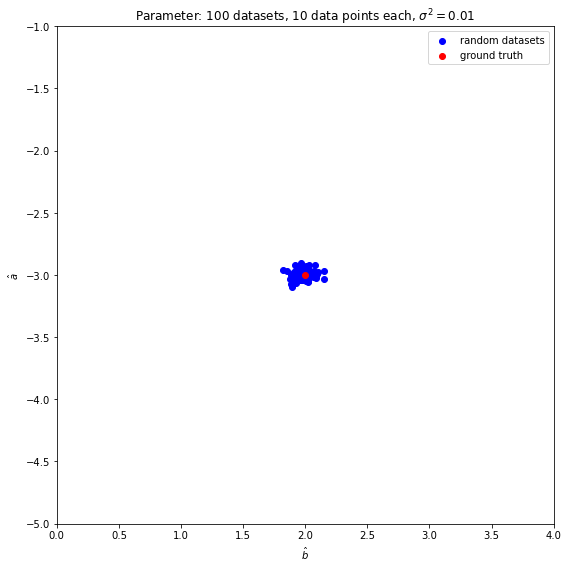

In [161]:
mean = 0
var = 0.01
m = 100 # Number of datasets
n = 10 # training examples in each dataset
title = 'Parameter: 100 datasets, 10 data points each, $\sigma^{2} = 0.01$'

plot_parameter(mean, var, m, n, title)

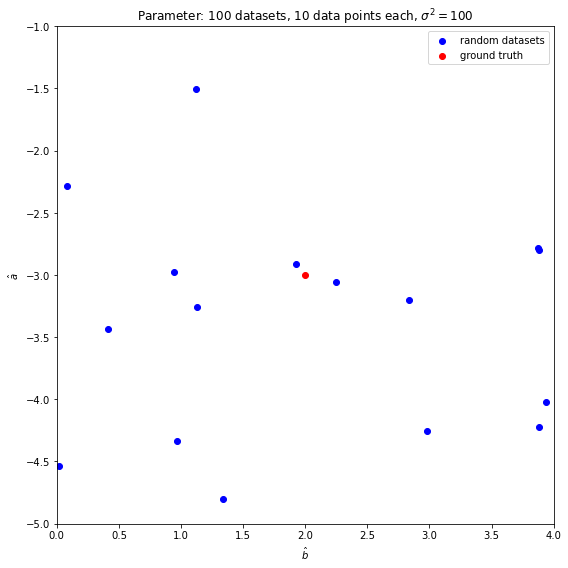

In [162]:
mean = 0
var = 100
m = 100 # Number of datasets
n = 10 # training examples in each dataset
title = 'Parameter: 100 datasets, 10 data points each, $\sigma^{2} = 100$'

plot_parameter(mean, var, m, n, title)